# Support Vector Machines

*Support Vector Machine* (SVM) is a powerful and versatil Machine Learning model, capable of performing linear and non-linear classification, regression and eve oitlier detection


## Linear SVM classification
For a better explanation of what SVM classification is about we are going to play again with the *Iris Flower* data set

In [8]:
#Let's set up our enviroment

import numpy as np
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
import sklearn

from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # petal length and petal witdh 
y = iris ['target']

setosa_or_versicolor = (y ==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


#SVM Classifier model

svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X,y)


SVC(C=inf, kernel='linear')

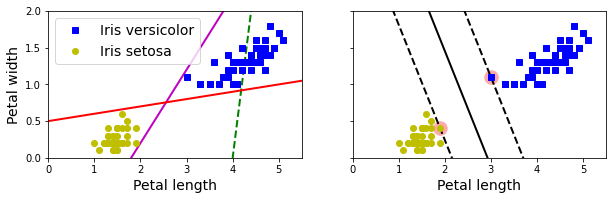

In [10]:
# Bad Models
x0 = np.linspace(0, 5.5, 200) #here in we are generating linear models with god to bad predictios
pred_1 = 5*x0 - 20
pred_2 = x0 -1.8
pred_3 =0.1*x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In the left figure, two of the models are able to satisfyingly classify both populations and the third performs poorly. However all three models are sensitive to small variations for the classification, eg. small petals for *versicolor* with a large petal witdh will be classified as *setosa* despite it is not.

In contrast the SVM model in the right not only separates the two classes but also stays as far away from the closest training instances as possible. It has a *large margin of classification*


> Note: SVMs are sensitive to the feature scales. It is highly recomended to scale the features e.g., ```Sklearn StandardScaler```


## Soft Margin Classification

If we impose that all instances must be off the street, this is called *hard margin classification*. It has two issues:
- It only works with linearly separable data.
- It is sensitive to ourliers

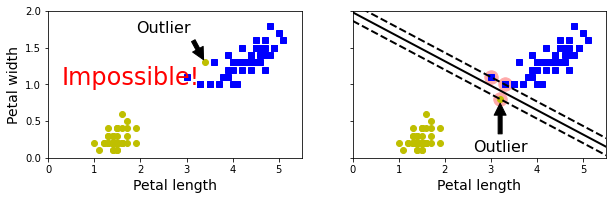

In [13]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

To avoid this issues, it is necesary to use a more flexible model.

When creating a SVM model using Scikit-Learn we can specify a number or hyperparameters. 

THe hyperparameter ```C``` is a regularization parameter. The strength of the regularization is inversively proportional to ```C```